# Exercises Tests Part 1

In [37]:
from termcolor import colored # type: ignore                                          # Colored text
from random import Random  # type: ignore                                             # Random number generator
import math  # type: ignore                                                           # Mathematical functions
import pandas as pd  # type: ignore                                                   # Data manipulation
import numpy as np  # type: ignore                                                    # Scientific computing
import matplotlib.pyplot as plt  # type: ignore                                       # Data visualization
from scipy.stats import binom as binomial  # type: ignore                             # Binomial distribution
from scipy.stats import norm as normal  # type: ignore                                # Normal distribution
from scipy.stats import poisson as poisson  # type: ignore                            # Poisson distribution
from scipy.stats import t as student  # type: ignore                                  # Student distribution
from scipy.stats import chi2  # type: ignore                                          # Chi-squared distribution
from scipy.stats import ttest_1samp  # type: ignore                                   # One-sample t-test
from scipy.stats import chisquare  # type: ignore                                     # Chi-squared test
from scipy.special import comb  # type: ignore                                        # Combinations
from mlxtend.frequent_patterns import apriori  # type: ignore                         # Apriori algorithm
from mlxtend.frequent_patterns import fpgrowth  # type: ignore                        # FP-growth algorithm
from mlxtend.frequent_patterns import association_rules  # type: ignore               # Association rules
from mlxtend.preprocessing import TransactionEncoder  # type: ignore                  # Transaction encoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # type: ignore  # Discriminant Analysis
from tensorflow import keras  # type: ignore                                          # Deep Learning library
from tensorflow.keras import Model  # type: ignore                                    # Model class
from tensorflow.keras.layers import Input, Dense, BatchNormalization  # type: ignore  # Layers
from tensorflow.keras.utils import to_categorical  # type: ignore                     # One-hot encoding
from tensorflow.keras.optimizers import Adam  # type: ignore                          # Optimizer
from livelossplot import PlotLossesKeras  # type: ignore                              # Live plot
from keras.src.optimizers import RMSprop  # type: ignore                              # Optimizer
from sklearn.model_selection import train_test_split  # type: ignore                  # Train-test split
from sklearn.metrics import roc_auc_score # type: ignore                              # ROC AUC score
from simanneal import Annealer  # type: ignore                                        # Simulated Annealing
from inspyred import ec  # type: ignore                                               # Evolutionary Computation
import warnings  # type: ignore                                                       # Disable warnings
from Resources.Functions import *  # type: ignore                                     # Custom functions
warnings.filterwarnings("ignore")                                                     # Disable warnings
outputColor = "blue"                                                                  # Color for the output

## Theoretical questions

### Question 1:
- We want to know how many requests a server has to process on average per day. We do a measurement for this. We measure for `30 days` and count it every day
number of requests. We arrive at a mean of `975` and a standard deviation equal to `100`.
     - Between what limits does the average number of requests lie if we want to be `95%` sure?
     - Suppose we found the same mean and standard deviation, but with a sample size of `100 days`. Then we are `95%` certain that the average is between ... and ....
     - Suppose someone claims that the server must process `1000 requests` per day. Can you support or reject this statement in the two cases? You want a certainty of `95%` again.

In [9]:
# 1
n = 30                                      # n = Population size
x_bar = 975                                 # x_bar = Sample mean
s = 100                                     # s = Sample standard deviation
p = 0.95                                    # p = Confidence level
df = n - 1                                  # df = Degrees of freedom
factor = student.ppf((1 + p) / 2, df=df)    # Factor = Z-Score
print(colored(f"Factor: {factor}", outputColor))
interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))

Factor: 2.045229642132703
Confidence Interval: (937.65938632419, 1012.34061367581)


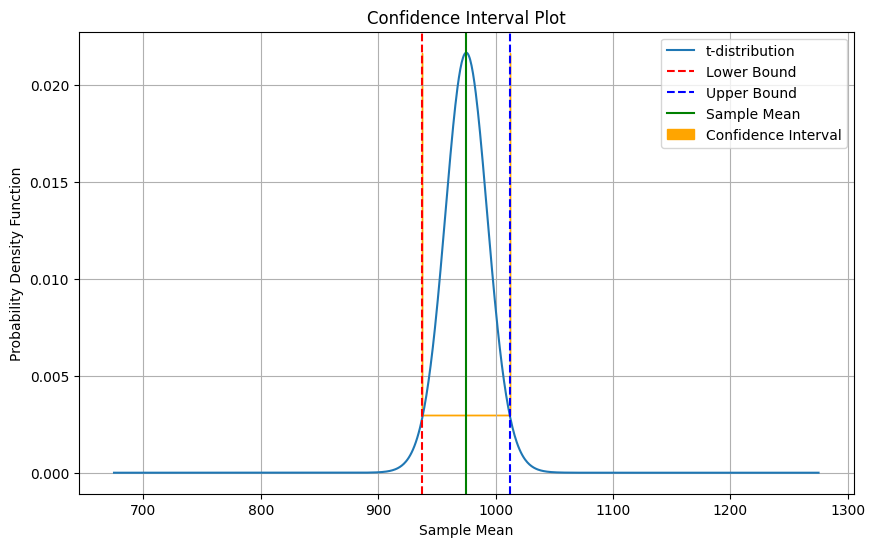

In [8]:
plot_confidence_interval(n, x_bar, s, df, factor)

In [10]:
# 2
n = 100                                     # n = Population size
x_bar = 975                                 # x_bar = Sample mean
s = 100                                     # s = Sample standard deviation
p = 0.95                                    # p = Confidence level
df = n - 1                                  # df = Degrees of freedom
factor = student.ppf((1 + p) / 2, df=df)    # Factor = Z-Score
print(colored(f"Factor: {factor}", outputColor))
interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))

Factor: 1.9842169515086827
Confidence Interval: (955.1578304849131, 994.8421695150869)


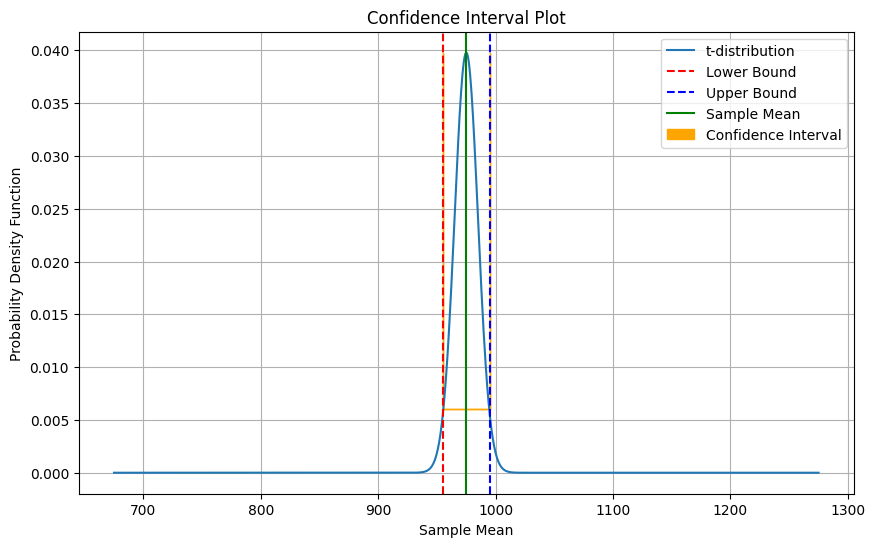

In [11]:
plot_confidence_interval(n, x_bar, s, df, factor)

In [12]:
# 3.1
n = 30                                      # n = Population size
x_bar = 1000                                # x_bar = Sample mean
s = 100                                     # s = Sample standard deviation
p = 0.95                                    # p = Confidence level
df = n - 1                                  # df = Degrees of freedom
factor = student.ppf((1 + p) / 2, df=df)    # Factor = Z-Score
print(colored(f"Factor: {factor}", outputColor))
interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))
# H0 Is not rejected

Factor: 2.045229642132703
Confidence Interval: (962.65938632419, 1037.34061367581)


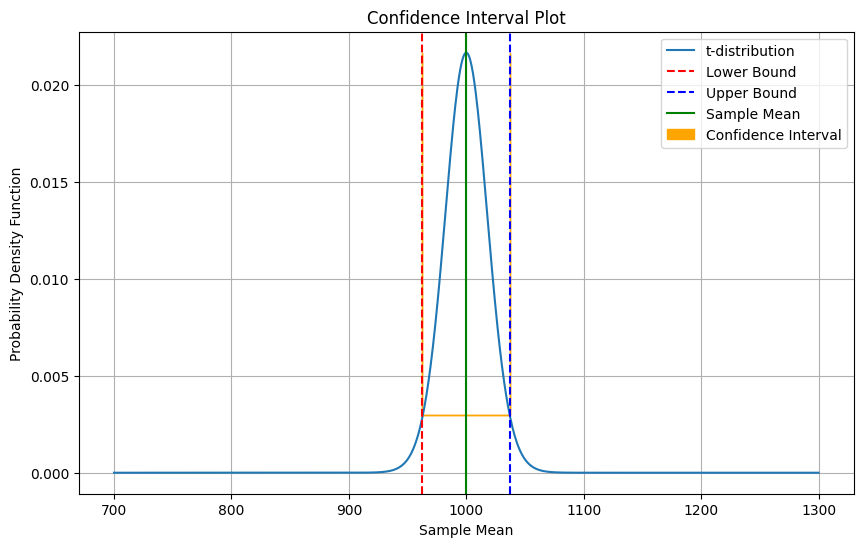

In [13]:
plot_confidence_interval(n, x_bar, s, df, factor)

In [14]:
# 3.2
n = 100                                     # n = Population size
x_bar = 1000                                # x_bar = Sample mean
s = 100                                     # s = Sample standard deviation
p = 0.95                                    # p = Confidence level
df = n - 1                                  # df = Degrees of freedom
factor = student.ppf((1 + p) / 2, df=df)    # Factor = Z-Score
print(colored(f"Factor: {factor}", outputColor))
interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))

Factor: 1.9842169515086827
Confidence Interval: (980.1578304849131, 1019.8421695150869)


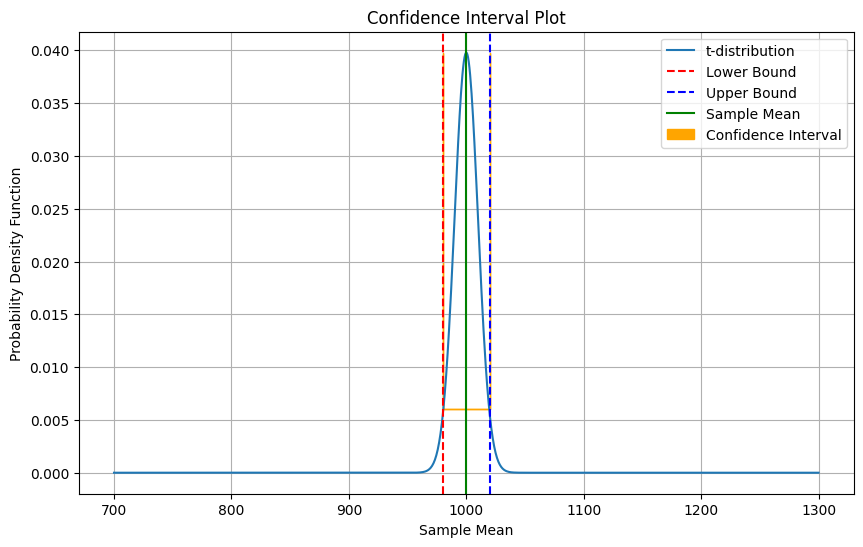

In [15]:
plot_confidence_interval(n, x_bar, s, df, factor)

### Question 2:
- A factory makes `12kg` bags of corn flakes. To test this, random samples are taken regularly. `100` bags are weighed. The first sample yields a mean of `11.9kg` and a standard deviation of `1kg`. We use an `alpha=0.01`.
     - Which factor (Z-value) will you use to determine the interval?
     - Do we need to adjust the machine?

- A second sample also yields a mean of `11.9kg`, but a standard deviation of `0.1kg`.
     - Which factor (Z-value) do we use this time?
     - Do we need to adjust the machine this time?

In [16]:
# 1
n = 100                                     # n = Population size
x_bar = 11.9                                # x_bar = Sample mean
s = 1                                       # s = Sample standard deviation
p = 0.99                                    # p = Confidence level
df = n - 1                                  # df = Degrees of freedom
factor = student.ppf((1 + p) / 2, df=df)    # Factor = Z-Score
print(colored(f"Factor: {factor}", outputColor))
interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))
print(colored(f"The machine does not need to be adjusted.", outputColor))

Factor: 2.6264054563851857
Confidence Interval: (11.637359454361482, 12.162640545638519)


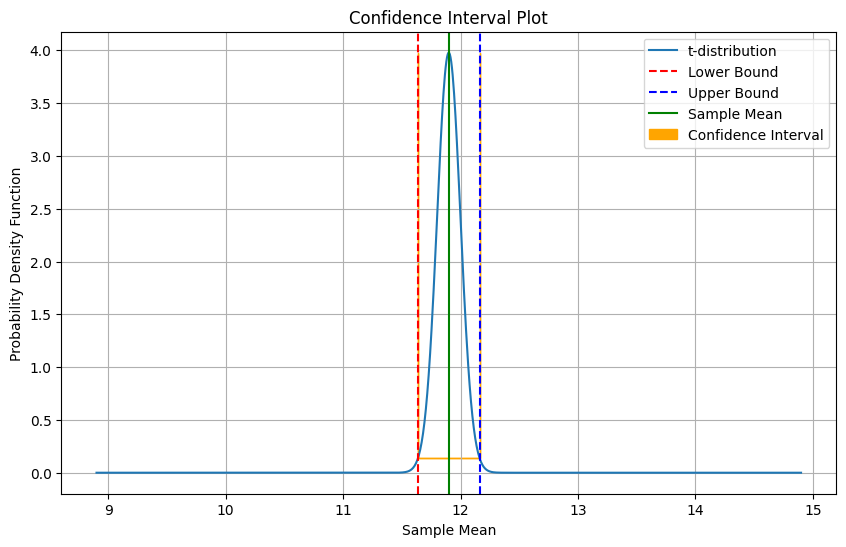

In [17]:
plot_confidence_interval(n, x_bar, s, df, factor)

In [18]:
# 2
n = 100                                     # n = Population size
x_bar = 11.9                                # x_bar = Sample mean
s = 0.1                                     # s = Sample standard deviation
p = 0.99                                    # p = Confidence level
df = n - 1                                  # df = Degrees of freedom
factor = student.ppf((1 + p) / 2, df=df)    # Factor = Z-Score
print(colored(f"Factor: {factor}", outputColor))
interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))
print(colored(f"The machine needs to be adjusted.", outputColor))

Factor: 2.6264054563851857
Confidence Interval: (11.873735945436149, 11.926264054563852)


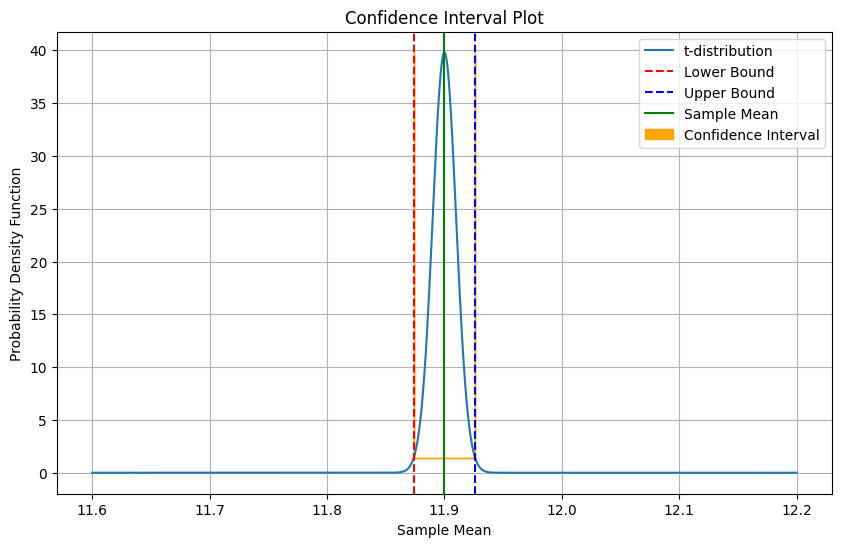

In [19]:
plot_confidence_interval(n, x_bar, s, df, factor)

### Question 3:
- On behalf of a cheese factory, we investigate whether some suppliers tamper with their milk by adding water. We take `5` consecutive shipments of milk and see at what temperature they freeze. We know that the freezing point of milk is `-0.545°C` with a standard deviation of `0.008°C`. The freezing point of water is of course `0°C`. In our sample we find an average freezing point of `-0.539 °C`. Set `alpha=0.1`
     - Which test are we going to use?
     - Should we apply this test one-sided or two-sided?
     - Was the milk tampered with?
     - What is the probability that the previous answer is wrong?

In [38]:
n = 5                                       # n = Population size
x_bar = -0.539                              # x_bar = Sample mean
s = 0.008                                   # s = Sample standard deviation
alpha = 0.1                                 # alpha = Significance level
p = 1 - alpha                               # p = Confidence level
factor = normal.ppf(p)                      # Factor = Z-Score

print(colored(f"We are going to calculate the Z-Toets.", outputColor))
print(colored(f"Two-sided test is necessary.", outputColor))


print(colored(f"Factor: {factor}", outputColor))
interval = normal.interval(confidence=p, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))

print(colored(f"What is the probability that my conclusion is wrong: {alpha}", outputColor))

We are going to calculate the Z-Toets.
Two-sided test is necessary.
Factor: 1.2815515655446004
Confidence Interval: (-0.5448848072366409, -0.5331151927633592)
What is the probability that my conclusion is wrong: 0.1


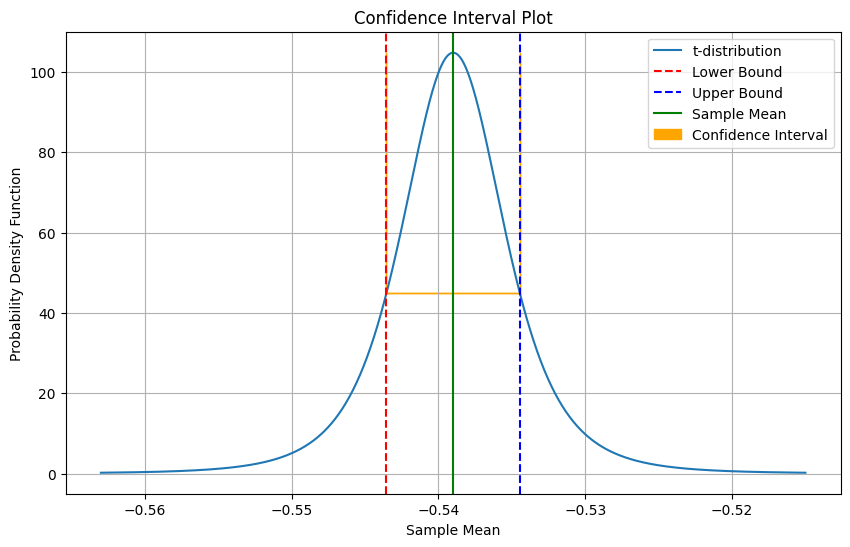

In [22]:
plot_confidence_interval(n, x_bar, s, n - 1, factor)

### Question 4:
- We wish to hire a programmer. We subject the candidates to a test. We know that a good programmer gets an average score of `100` on this one
test. A few (`16`) students from KdG volunteered. We arrive at a mean of `107.3` and a standard deviation of `8.0`.
     - Take `alpha=0.05`. We suspect that this group deviates from the average population.
         - Which test do we use?
         - Which factor are we going to use?
     - We can set an interval within which we are `95%` certain that KdG students score on average.
         - What is the lower limit of the interval?
         - What is the upper limit of the interval?
         - Can we say on the basis of this interval that KdG students score better than average?

In [39]:
# 1
print(colored(f"We are going to use 'student' instead of 'normal' because the population standard deviation is not known.", outputColor))

# 2
n = 16                                      # n = Population size
df = n - 1                                  # df = Degrees of freedom
alpha = 0.05                                # alpha = Significance level
p = 1 - alpha                               # p = Confidence level
factor = student.ppf((1 + p) / 2, df=df)    # Factor = Z-Score
print(colored(f"Factor: {factor}", outputColor))

# 3 & 4 & 5
n = 16                                      # n = Population size
x_bar = 107.3                               # x_bar = Sample mean
s = 8                                       # s = Sample standard deviation
p = 0.95                                    # p = Confidence level
df = n - 1                                  # df = Degrees of freedom
interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval lower limit: {interval[0]}", outputColor))
print(colored(f"Confidence Interval upper limit: {interval[1]}", outputColor))

print(colored(f"We can say on the basis of this interval that KdG students score better than average because the lower limit of the interval is higher than the average score of 100.", outputColor))

We are going to use 'student' instead of 'normal' because the population standard deviation is not known.
Factor: 2.131449545559323
Confidence Interval lower limit: 103.03710090888136
Confidence Interval upper limit: 111.56289909111864
We can say on the basis of this interval that KdG students score better than average because the lower limit of the interval is higher than the average score of 100.


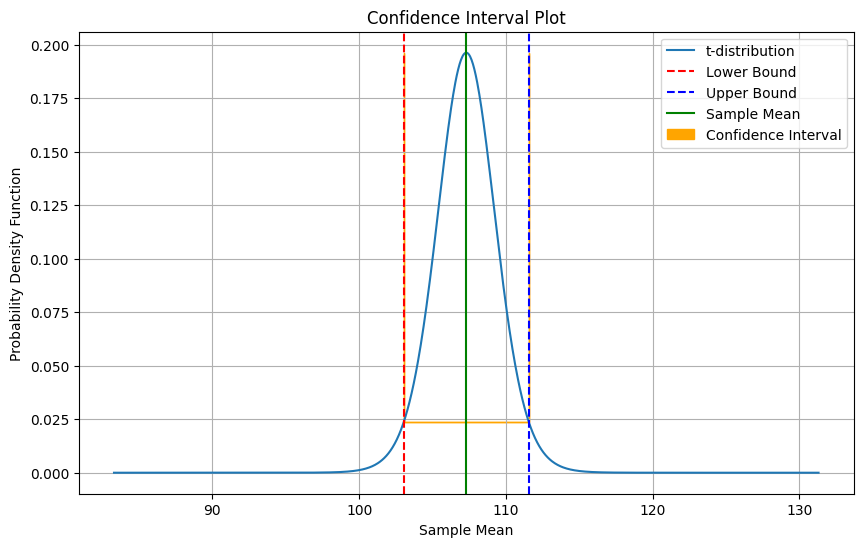

In [26]:
plot_confidence_interval(n, x_bar, s, df, factor)

## Practical exercises (Python)

In [27]:
studentQuestions = pd.read_csv('../Data/Data1.csv', delimiter=';', decimal=',')
display(studentQuestions)

,gapminder,schrijfhand,schoenmaat,lengte,bloedgroep,resus,siblings,Samenzweringen,rijbewijs,domicilie in Antwerpen,...,M1 - stelen,M2 - team,M3 - beschermen,M4 - voorbeeld,M5 - embryo,M6 - vrijheid,mascotte,zwaarste vak,boeienste vak,studiepunt
0,7/18,Rechts,43.0,184,O,positief,5,De tsunami van 2004 in de Indische Oceaan was ...,Categorie B: Wagens.,"buiten de stad (een dorp, een gehucht, het pla...",...,7,2,8,6,5,4.0,"1=Bever,2=Wasbeer,3=Otter,4=Wolf,5=Poema,6=Pan...",Management 1,Data science 1,16-20 uren
1,3/18,Rechts,42.0,163,Weet ik niet,Weet ik niet,1,Prinses Diana kwam niet per ongeluk om het leven,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,10,5,10,6,7,3.0,"1=Bever,2=Wolf,3=Bizon,4=Otter,5=Panter,6=Poem...",Management 1,Computersystemen 1,<= 10 uren
2,12/18,Rechts,45.0,183,AB,positief,2,Prinses Diana kwam niet per ongeluk om het lev...,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,6,3,7,7,10,6.0,"1=Bruine beer,2=Poema,3=Panter,4=Wolf,5=Vos,6=...",Management 1,Programmeren 1 - Java,16-20 uren
3,5/18,Rechts,44.0,175,A,positief,2,De wereld wordt eigenlijk gecontroleerd door e...,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,9,10,10,10,10,0.0,"1=Wasbeer,2=Wolf,3=Bruine beer,4=Das,5=Vos,6=B...",Management 1,Data science 1,<= 10 uren
4,6/18,Rechts,43.0,173,B,positief,3,De wereld wordt eigenlijk gecontroleerd door e...,Categorie B: Wagens.,in een stad,...,10,6,10,7,7,2.0,"1=Wolf,2=Vos,3=Bruine beer,4=Bizon,5=Panter,6=...",Management 1,Data science 1,<= 10 uren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,7/18,Rechts,45.0,185,O,negatief,0,De maanlanding is in scne gezet om de Russen ...,Categorie AM: Bromfietsen met een maximumsnelh...,"buiten de stad (een dorp, een gehucht, het pla...",...,10,3,8,8,2,5.0,"1=Panter,2=Poema,3=Wolf,4=Vos,5=Bever,6=Bruine...",Software engineering 1,User interfaces 1,26-30 uren
85,9/18,Rechts,43.0,184,O,Weet ik niet,2,De aanslagen van 9/11 in NY werden niet door t...,Categorie AM: Bromfietsen met een maximumsnelh...,"buiten de stad (een dorp, een gehucht, het pla...",...,8,5,7,8,4,0.0,"1=Panter,2=Poema,3=Vos,4=Wolf,5=Bruine beer,6=...",Data science 1,Programmeren 1 - Embedded,11-15 uren
86,4/18,Links,45.5,190,Weet ik niet,Weet ik niet,0,Prinses Diana kwam niet per ongeluk om het lev...,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,10,5,10,8,9,5.0,"1=Wolf,2=Vos,3=Bruine beer,4=Bever,5=Das,6=Was...",User interfaces 1,Data science 1,16-20 uren
87,8/18,Rechts,45.0,188,A,positief,1,NaN,Categorie B: Wagens.,in een stad,...,8,6,6,7,6,4.0,"1=Otter,2=Wasbeer,3=Vos,4=Bruine beer,5=Bever,...",Netwerken 1,Data science 1,16-20 uren


### Exercise 1:
- Add a column to the data frame and place the stature of a person in it expressed in shoe size (i.e. height divided by shoe size).

In [28]:
studentQuestions['lengte_schoenmaat'] = studentQuestions['lengte'] / studentQuestions['schoenmaat']

### Exercise 2:
- Determine the mean and standard deviation.

In [29]:
average = studentQuestions['lengte_schoenmaat'].mean()
standardDeviation = studentQuestions['lengte_schoenmaat'].std()
print(colored(f"Average: {average}", outputColor))
print(colored(f"Standard deviation: {standardDeviation}", outputColor))

Average: 4.167049413790356
Standard deviation: 0.15332544212731153


### Exercise 3:
- Give the confidence interval (alpha=`0.05`) for the average height-to-shoe size ratio.

In [30]:
n = studentQuestions.shape[0]                           # n = Population size
x_bar = studentQuestions['lengte_schoenmaat'].mean()    # x_bar = Sample mean
s = standardDeviation                                   # s = Sample standard deviation
alpha = 0.05                                            # alpha = Significance level
p = 1 - alpha                                           # p = Confidence level
df = n - 1                                              # df = Degrees of freedom
factor = student.ppf((1 + p) / 2, df=df)                # Factor = Z-Score
print(colored(f"Factor: {factor}", outputColor))
interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))

Factor: 1.9872898646909385
Confidence Interval: (4.134751056090288, 4.199347771490425)


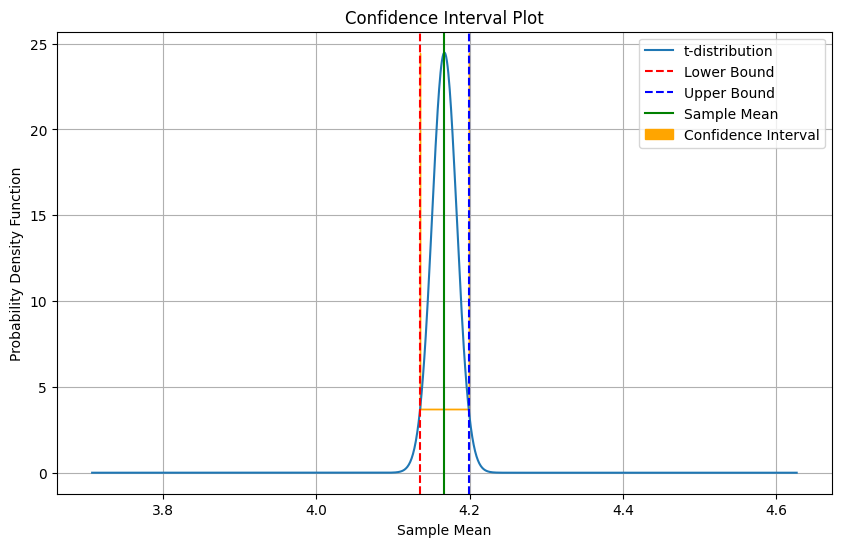

In [31]:
plot_confidence_interval(n, x_bar, s, df, factor)

### Exercise 4:
- Iemand beweert dat de verhouding gestalte-schoenmaat van een mens gelijk is aan `4.2`. Kan je op basis van de gegevens uit de vragenlijst dit (alpha=`0.05`) bijtreden? En indien alpha = `2.5%`?

In [32]:
n = studentQuestions.shape[0]                   # n = Population size
x_bar = 4.2                                     # x_bar = Sample mean
s = standardDeviation                           # s = Sample standard deviation
alpha = 0.05                                    # alpha = Significance level
p = 1 - alpha                                   # p = Confidence level
df = n - 1                                      # df = Degrees of freedom
factor = student.ppf((1 + p) / 2, df=df)        # Factor = Z-Score
print(colored(f"Factor: {factor}", outputColor))
interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))
# H0 Is rejected

Factor: 1.9872898646909385
Confidence Interval: (4.167701642299932, 4.232298357700069)


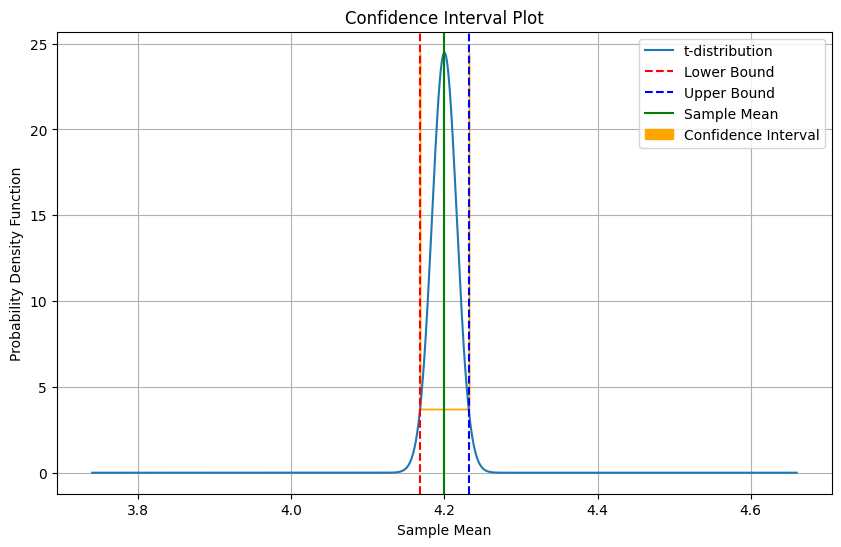

In [33]:
plot_confidence_interval(n, x_bar, s, df, factor)

In [34]:
n = studentQuestions.shape[0]                   # n = Population size
x_bar = 4.2                                     # x_bar = Sample mean
s = standardDeviation                           # s = Sample standard deviation
alpha = 0.025                                   # alpha = Significance level
p = 1 - alpha                                   # p = Confidence level
df = n - 1                                      # df = Degrees of freedom
factor = student.ppf((1 + p) / 2, df=df)        # Factor = Z-Score
print(colored(f"Factor: {factor}", outputColor))
interval = student.interval(confidence=p, df=df, loc=x_bar, scale=s / math.sqrt(n))
print(colored(f"Confidence Interval: {interval}", outputColor))
# H0 Is rejected

Factor: 2.280400469937275
Confidence Interval: (4.162937872634452, 4.237062127365548)


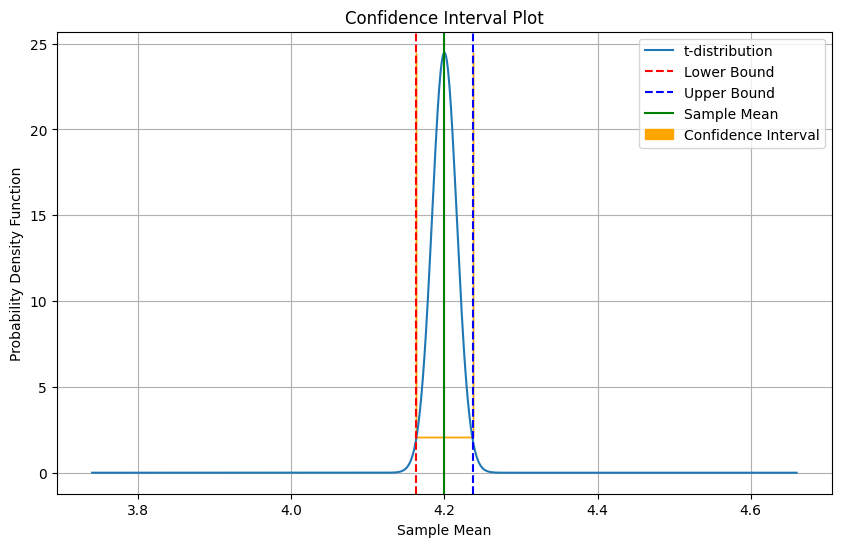

In [35]:
plot_confidence_interval(n, x_bar, s, df, factor)

## Testing examples:

### Experiment 1: (Student distribution)

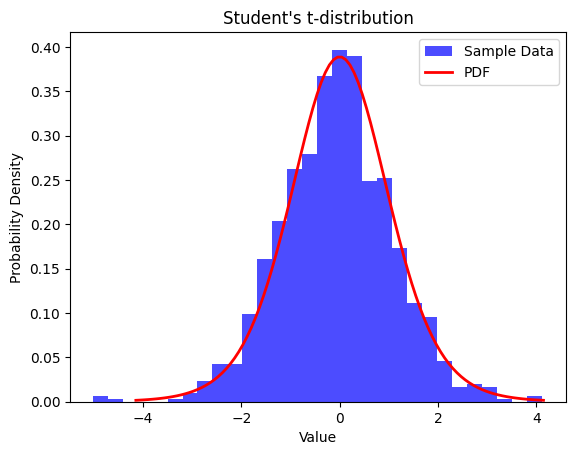

In [36]:
# Set the degrees of freedom (df) for the Student's t-distribution
degrees_of_freedom = 10  # You can adjust this value

# Generate random data from Student's t-distribution
data = student.rvs(degrees_of_freedom, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.7, color='blue', label='Sample Data')

# Plot the probability density function (PDF) of the Student's t-distribution
x = np.linspace(student.ppf(0.001, degrees_of_freedom), student.ppf(0.999, degrees_of_freedom), 100)
plt.plot(x, student.pdf(x, degrees_of_freedom), 'r-', lw=2, label='PDF')

# Add labels and a legend
plt.title('Student\'s t-distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()